**DM assignment**

**We will perform Data Cleaning, Data Pre-processing and Data analysis activities**

**We will generate association rule using Apriori Algorithm**

# Problem statement

We have been given employee data set and we have to recognize patterns from the available data and evaluate efficiency of methods to obtain patterns. 

In [ ]:
# Install Apriori  Library
!pip install apriori

  Created wheel for apriori: filename=apriori-1.0.0-cp36-none-any.whl size=2478 sha256=acc3feef9b45ff99877c7a0d36bc0e3843862305519e89d4ac8407a0ee37da22
  Stored in directory: /root/.cache/pip/wheels/20/c3/82/6e5f443b9a41b1e9ad991017fb64814bc75b4654409a073ea3
Successfully built apriori


In [ ]:
# Install Apyori  Library
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=c9bf1319768eb4a637ddc3f48c74809a5f610f4d1fe49dbae5ac277267202cb5
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


Import all the require library

In [2]:
#  Import Libraries such as Numpy, Panda and Matplotlib 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# from apyori import apriori

Read the input data set from desktop using the file library specfically used in google collab.

In [5]:
# Read Input file from Desktop using File Library of Google collab.
# Please use choose file button to select the path of file
Inp_data = files.upload()

Saving Employee_skills_traits.csv to Employee_skills_traits (1).csv


Declare missign value which we want to check in given data set

In [6]:
missing_values = ['?', '']

Convert the input file data into data frame usign Panda's Library for further analysizing the data

In [7]:
# Get into Data frames from input file using panda library
Data = pd.read_csv('Employee_skills_traits.csv', 
                   index_col=False,
                   sep=',',
                   na_values = missing_values)

Check the Header of data what kind of data we have 

In [8]:
# Removing white spaces from column names
Data.rename(columns=lambda x: x.strip(), inplace=True)

# •	Perform exploratory data analysis

In [9]:
#Display Header of Data
Data.head()

,ID,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


Check the data attributes like shape and give statistics about the data

In [10]:
# Check the size of Data
Data.describe

<bound method NDFrame.describe of         ID  Employment_period  ...  Awards  Communicative
0     6723                  5  ...       0              1
1     8923                  5  ...       0              0
2     2322                 11  ...       0              1
3      235                  7  ...       1              0
4     9523                 18  ...       1              1
..     ...                ...  ...     ...            ...
993   6098                 12  ...       0              1
994  12133                 16  ...       1              1
995    854                 11  ...       0              0
996  13444                  8  ...       1              1
997  17170                 16  ...       0              0

[998 rows x 14 columns]>

In [11]:
# Summarize numerical features
# Display the statistical overview of the employees
Data.describe()

,ID,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,9710.248497,10.388778,5.660321,0.484970,0.504008,40.441884,0.48998,0.476954,0.475952,0.508016,0.477956,0.503006,0.502004,0.521042
std,5639.386232,5.787715,3.196953,0.500025,0.500235,8.059964,0.50015,0.499719,0.499672,0.500186,0.499764,0.500242,0.500247,0.499808
min,235.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4878.500000,5.000000,3.000000,0.000000,0.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9413.000000,10.000000,5.000000,0.000000,1.000000,40.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,14619.750000,15.000000,8.000000,1.000000,1.000000,47.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20078.000000,20.000000,12.000000,1.000000,1.000000,55.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As Part of data preprocessing will check our data quality like what kind of data we have and is there null value or blank which needs to be handled

In [12]:
# Check if our data has any null values 
Data.isnull().any()

ID                                      False
Employment_period                       False
Time_in_current_department              False
Gender                                  False
Team_leader                             False
Age                                     False
Member_of_professional_organizations    False
Dot_Net                                 False
SQL_Server                              False
HTML_CSS_Java_Script                    False
PHP_mySQL                               False
Fast_working                            False
Awards                                  False
Communicative                           False
dtype: bool

There is no null value in out data so we don't need any specail handling to fill or remove those tuples

We will check what type of data we have

In [13]:
# Cecking out the data types for each of our variables. We want to get a sense of whether or not data is numerical (int64, float64) or not (object). 
Data.dtypes

ID                                      int64
Employment_period                       int64
Time_in_current_department              int64
Gender                                  int64
Team_leader                             int64
Age                                     int64
Member_of_professional_organizations    int64
Dot_Net                                 int64
SQL_Server                              int64
HTML_CSS_Java_Script                    int64
PHP_mySQL                               int64
Fast_working                            int64
Awards                                  int64
Communicative                           int64
dtype: object

We have all Data of INT64 type

Now we will check data size number of rows and coulmns in our data set

In [14]:
# Check the information of Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   ID                                    998 non-null    int64
 1   Employment_period                     998 non-null    int64
 2   Time_in_current_department            998 non-null    int64
 3   Gender                                998 non-null    int64
 4   Team_leader                           998 non-null    int64
 5   Age                                   998 non-null    int64
 6   Member_of_professional_organizations  998 non-null    int64
 7   Dot_Net                               998 non-null    int64
 8   SQL_Server                            998 non-null    int64
 9   HTML_CSS_Java_Script                  998 non-null    int64
 10  PHP_mySQL                             998 non-null    int64
 11  Fast_working                          998 non

In the given dataset we have 998 row (tuples) and 14 Coulmns( Features)

#•	Preprocess the data

As part of data pre-processing we will check in provided data do we have any duplicate lines are there or not

In [15]:
# Check if we have any duplicate data based on column ID.
duplicate_rows= Data[Data.duplicated(['ID'],keep=False)]

print("number of duplicate rows- ", sum(Data.duplicated(['ID'])))
# Print the number of duplicate rows
duplicate_rows.head()

number of duplicate rows-  24


,ID,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative
21,5170,11,11,0,0,42,1,0,1,1,1,1,1,1
31,11085,20,2,0,1,50,1,1,1,0,1,0,0,0
56,15645,2,2,1,0,54,1,1,0,1,1,1,1,0
72,15645,8,5,0,0,28,0,1,0,1,1,0,1,1
95,17000,12,12,1,0,43,0,0,0,1,0,0,0,0


# Observations

1) There are 998 items in the dataset and 14 features.

2) There are no empty items

3) There are both categorical and numerical value in the given data set.

4) ID is a running queue to identify an employee uniquely.

5) Employment Period, Time in current department and Age are numerical values.

6) Gender, Team leader, Member of professional organizations, .Net, SQL Server, HTML CSS Java Script, PHP mySQL, Fast working, Awards and Communicative are all binary type of data having value either 0 or 1. 0 meaning absence of skill and 1 meaning presence.

7) There doesn't seem to be noisy data in this data set as all binary type of columns have either 0 or 1 values. Also Age, Employment period and Time in current department seem to be well within the acceptable range.

8) All the numerical columns follow the same scale, i.e., number of years and hence no further scaling may be needed.

9) As we can see, for the same employee ID, there are duplicate rows in the dataset. There are 24 ID's having duplicate entries in the table.

We will remove the duplicate tuples from data set and while removing we will keep the first entry from the data set and remove other duplicate tuples

In [16]:
print("Dimension of the table before deleting duplicates - ",Data.shape)

# Remove the duplicate Data from Data set as part of cleaning activity.
cleanData = Data.drop_duplicates(['ID'],keep='first',inplace=False)
print("Dimension of the table before after duplicates - ",cleanData.shape)

Dimension of the table before deleting duplicates -  (998, 14)
Dimension of the table before after duplicates -  (974, 14)


After removing duplicate entries we have now 974 Tuples

In [17]:
# Summarize numerical features
# Display the statistical overview of the employees
cleanData.describe()

,ID,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative
count,974.000000,974.000000,974.000000,974.00000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,9685.273101,10.383984,5.666324,0.48460,0.504107,40.468172,0.492813,0.475359,0.477413,0.510267,0.477413,0.506160,0.503080,0.521561
std,5644.149190,5.803602,3.206903,0.50002,0.500240,8.080181,0.500205,0.499649,0.499746,0.500151,0.499746,0.500219,0.500247,0.499792
min,235.000000,1.000000,1.000000,0.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4763.250000,5.000000,3.000000,0.00000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9389.000000,10.000000,5.000000,0.00000,1.000000,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,14570.500000,15.000000,8.000000,1.00000,1.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20078.000000,20.000000,12.000000,1.00000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Drop the ID as there is no use of while finding association rule
# For drop any Column which is not relavant to finding association rule
# cleanData.drop('ID',axis=1)

As part of data reduction we will drop the employee ID as while generating association rule using Apriori we don't need the employee ID

In [19]:
# Check Data shape after droping ID column as that will not be used for finding any Association rules
cleanData.shape
cleanData.head()
df = cleanData.drop('ID',axis=1)

Check the data after droping Employee ID

In [20]:
df.head()

,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative
0,5,4,0,1,48,1,1,1,0,1,1,0,1
1,5,3,1,1,26,1,1,0,0,1,1,0,0
2,11,8,0,0,34,0,0,1,1,0,1,0,1
3,7,5,1,1,27,1,0,1,0,1,1,1,0
4,18,8,0,0,38,0,0,0,1,1,1,1,1


In [21]:
#Extracting categorical features
categorical_features = [col for col in cleanData if np.isin(cleanData[col].unique(), range(0,21)).all()]

In [22]:
categorical_features

['Employment_period',
 'Time_in_current_department',
 'Gender',
 'Team_leader',
 'Member_of_professional_organizations',
 'Dot_Net',
 'SQL_Server',
 'HTML_CSS_Java_Script',
 'PHP_mySQL',
 'Fast_working',
 'Awards',
 'Communicative']

We have total 12 categorical features

In [23]:
#extracting all the continuous features
continuous_features = [col for col in cleanData if not np.isin(cleanData[col].unique(),range(0,21)).all()]

In [24]:
continuous_features

['ID', 'Age']

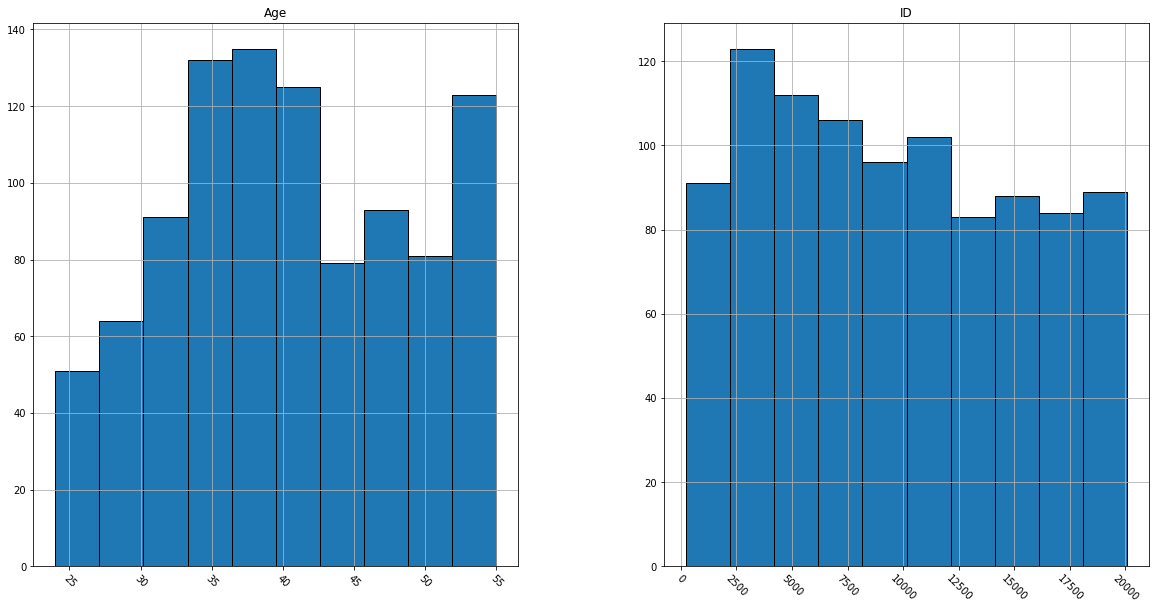

In [25]:
# Plot histogram grid on continuous features
cleanData[continuous_features].hist(figsize=(20,10), xrot=-45, edgecolor='black')

# Clear the text "residue"
plt.show()

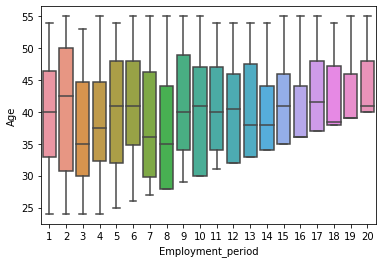

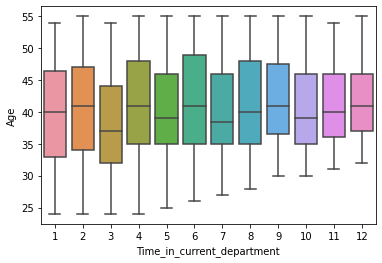

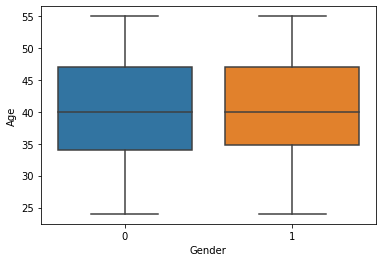

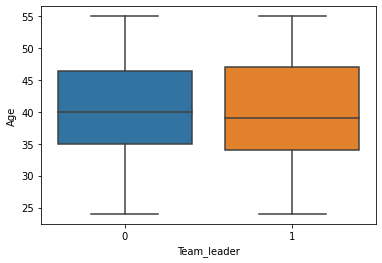

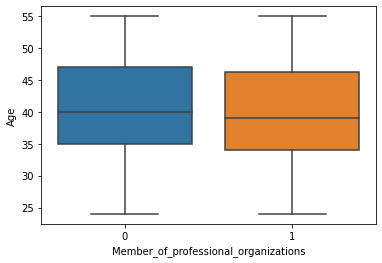

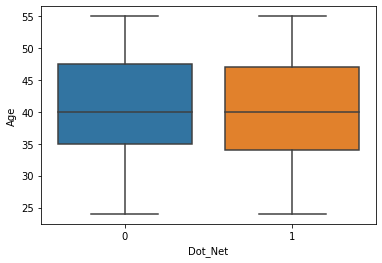

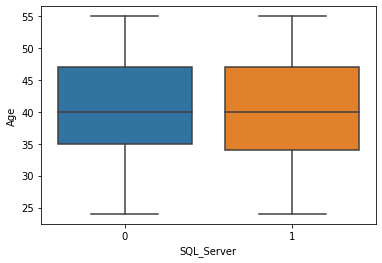

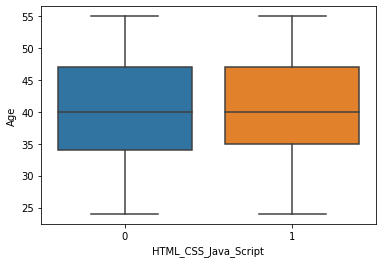

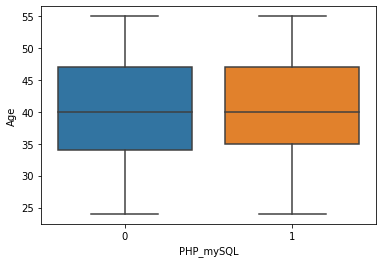

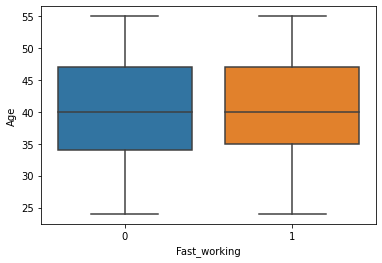

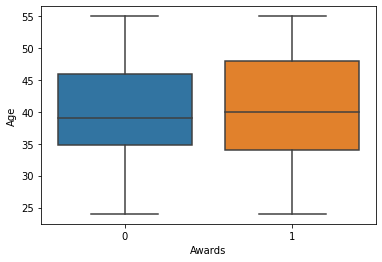

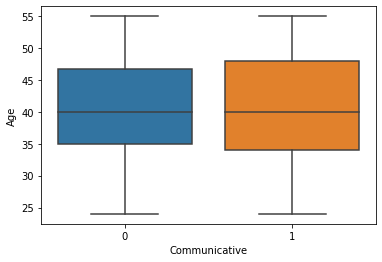

In [26]:
# Segment satisfaction by status and plot distributions
for cat_feat in categorical_features:
    sns.boxplot(y='Age', x = cat_feat, data=df)
    plt.show()

# Now will convert continues values into Bins

As part of Data analysis we will check mean, standard deviation and min, max and 5-Point of Employment period

In [27]:
# Get the attribute/ Details of Employment period.
df['Employment_period'].describe()

count    974.000000
mean      10.383984
std        5.803602
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Employment_period, dtype: float64

As Employement period is numerical data and we will perform equi-width binning on data and data new column representing bins
Based on above ananlysis we will convert in to 4 bins and width of 5

In [28]:
# Convert the employment period in to bins and add new colmns
employment_period_bin_label = ['0-5', '6-10', '11-15', '16-20']
cut_bins = [0, 5, 10, 15, 20]
df['employment_period_bin'] = pd.cut(df['Employment_period'], bins=cut_bins, labels=employment_period_bin_label)

After Binning each tuple will be assigned there particulare bin

In [29]:
#  Check if new column of Employment range(Bins) are created
df.head()

,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative,employment_period_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20


As part of Data analysis we will check mean, standard deviation and min, max and 5-Point of age also similar to Employement period

In [30]:
# Similar to employement period convert Age into range (Bins) and Check Head for the same
df['Age'].describe()

count    974.000000
mean      40.468172
std        8.080181
min       24.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       55.000000
Name: Age, dtype: float64

As Age is numerical data and we will perform equi-width binning on data and data new column representing bins Based on above ananlysis we will convert in to 4 bins and width of 10

In [31]:

age_bin_label = ['20-30', '31-40', '41-50', '51-60']
cut_bins_age = [20, 30, 40, 50, 60]
df['age_bin'] = pd.cut(df['Age'], bins=cut_bins_age, labels=age_bin_label)
df.head()

,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative,employment_period_bin,age_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5,41-50
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5,20-30
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15,31-40
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10,20-30
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20,31-40


After Binning each tuple will be assigned there particulare ageing bin under new column

As part of Data analysis we will check mean, standard deviation and min, max and 5-Point of Time in currrent department also similar to age and Employement period

In [32]:
# Check Time in current department
df['Time_in_current_department'].describe()

count    974.000000
mean       5.666324
std        3.206903
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: Time_in_current_department, dtype: float64

We will perform equi-width binning on data and data new column representing bins Based on above ananlysis we will convert in to 4 bins and width of 3 

In [33]:
# Convert this also into bins so that it will be helpful for analsizing
current_department_bin_label = ['0-3', '4-6', '7-9', '10-12']
cut_bins_curr_dept = [0, 3, 6, 9, 12]
df['age_curr_dept_bin'] = pd.cut(df['Time_in_current_department'], bins=cut_bins_curr_dept, labels=current_department_bin_label)
df.head()

,Employment_period,Time_in_current_department,Gender,Team_leader,Age,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative,employment_period_bin,age_bin,age_curr_dept_bin
0,5,4,0,1,48,1,1,1,0,1,1,0,1,0-5,41-50,4-6
1,5,3,1,1,26,1,1,0,0,1,1,0,0,0-5,20-30,0-3
2,11,8,0,0,34,0,0,1,1,0,1,0,1,11-15,31-40,7-9
3,7,5,1,1,27,1,0,1,0,1,1,1,0,6-10,20-30,4-6
4,18,8,0,0,38,0,0,0,1,1,1,1,1,16-20,31-40,7-9


# Data reduction

As part of data reduction we can drop the original coulmns from Data set 

In [34]:
# Drop the original columns and Keep the new colums created
binnedData = df.drop(columns=['Age','Time_in_current_department', 'Employment_period'])

Check Header after droping extra colmns

In [35]:
binnedData.head()


,Gender,Team_leader,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative,employment_period_bin,age_bin,age_curr_dept_bin
0,0,1,1,1,1,0,1,1,0,1,0-5,41-50,4-6
1,1,1,1,1,0,0,1,1,0,0,0-5,20-30,0-3
2,0,0,0,0,1,1,0,1,0,1,11-15,31-40,7-9
3,1,1,1,0,1,0,1,1,1,0,6-10,20-30,4-6
4,0,0,0,0,0,1,1,1,1,1,16-20,31-40,7-9


Get the name of columns available in data set

In [36]:
binnedData.columns

Index(['Gender', 'Team_leader', 'Member_of_professional_organizations',
       'Dot_Net', 'SQL_Server', 'HTML_CSS_Java_Script', 'PHP_mySQL',
       'Fast_working', 'Awards', 'Communicative', 'employment_period_bin',
       'age_bin', 'age_curr_dept_bin'],
      dtype='object')

Now will make a column of each bin so that we can conver binned data into binary data

In [37]:
# Make BIN into columns and represent with binary values against that bin.
dummy_cols= ['employment_period_bin','age_bin','age_curr_dept_bin']
binnedDummyData = pd.get_dummies(binnedData, columns=dummy_cols)
binnedDummyData.head()

,Gender,Team_leader,Member_of_professional_organizations,Dot_Net,SQL_Server,HTML_CSS_Java_Script,PHP_mySQL,Fast_working,Awards,Communicative,employment_period_bin_0-5,employment_period_bin_6-10,employment_period_bin_11-15,employment_period_bin_16-20,age_bin_20-30,age_bin_31-40,age_bin_41-50,age_bin_51-60,age_curr_dept_bin_0-3,age_curr_dept_bin_4-6,age_curr_dept_bin_7-9,age_curr_dept_bin_10-12
0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1,1,1,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0


After adding new columns check the number of columns and row available in data set

In [38]:
binnedDummyData.shape

(974, 22)

In [39]:
binnedDummyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 997
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Gender                                974 non-null    int64
 1   Team_leader                           974 non-null    int64
 2   Member_of_professional_organizations  974 non-null    int64
 3   Dot_Net                               974 non-null    int64
 4   SQL_Server                            974 non-null    int64
 5   HTML_CSS_Java_Script                  974 non-null    int64
 6   PHP_mySQL                             974 non-null    int64
 7   Fast_working                          974 non-null    int64
 8   Awards                                974 non-null    int64
 9   Communicative                         974 non-null    int64
 10  employment_period_bin_0-5             974 non-null    uint8
 11  employment_period_bin_6-10            974 non

#Association Rule Mining

Now we will Discover frequent patterns using Apriori Library

# 1st Iteration

In [55]:
df_frequent_data = apriori(binnedDummyData, min_support=0.1, use_colnames=True)

In [56]:
df_frequent_data

,support,itemsets
0,0.484600,(Gender)
1,0.504107,(Team_leader)
2,0.492813,(Member_of_professional_organizations)
3,0.475359,(Dot_Net)
4,0.477413,(SQL_Server)
...,...,...
305,0.127310,"(Awards, Communicative, PHP_mySQL)"
306,0.105749,"(age_bin_31-40, Communicative, PHP_mySQL)"
307,0.129363,"(Fast_working, Awards, Communicative)"
308,0.102669,"(Fast_working, age_bin_31-40, Awards)"


In [57]:
df_rules = association_rules(df_frequent_data, metric="lift", min_threshold=1)

In [58]:
df_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Team_leader),0.484600,0.504107,0.249487,0.514831,1.021273,0.005197,1.022103
1,(Team_leader),(Gender),0.504107,0.484600,0.249487,0.494908,1.021273,0.005197,1.020410
2,(Gender),(HTML_CSS_Java_Script),0.484600,0.510267,0.248460,0.512712,1.004791,0.001185,1.005017
3,(HTML_CSS_Java_Script),(Gender),0.510267,0.484600,0.248460,0.486922,1.004791,0.001185,1.004526
4,(Gender),(PHP_mySQL),0.484600,0.477413,0.248460,0.512712,1.073938,0.017106,1.072440


In [59]:
df_rules.describe

<bound method NDFrame.describe of                         antecedents  ... conviction
0                          (Gender)  ...   1.022103
1                     (Team_leader)  ...   1.020410
2                          (Gender)  ...   1.005017
3            (HTML_CSS_Java_Script)  ...   1.004526
4                          (Gender)  ...   1.072440
..                              ...  ...        ...
595      (age_bin_31-40, PHP_mySQL)  ...   1.002687
596                 (Communicative)  ...   1.000624
597                     (PHP_mySQL)  ...   1.016810
598  (age_bin_31-40, Communicative)  ...   1.044265
599                  (Fast_working)  ...   1.011009

[600 rows x 9 columns]>

Based on Minimun support of 0.1 we have 300 frequent datasets and we have got 600 association rules

Now will increase the min support to 0.175 and see how many frequent dataset will be formed and association rules

We will try to find interesting rule from all generated assocation rule have confidence more than 0.55 and Support more than 0.15

In [60]:
important_business_rules = df_rules[ (df_rules['confidence'] >= 0.55) & (df_rules['lift'] >= 1) & (df_rules['support'] >= 0.15)]
print(important_business_rules.shape)
important_business_rules.sort_values(by='confidence',ascending=False)


(10, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
138,(employment_period_bin_0-5),(age_curr_dept_bin_0-3),0.262834,0.324435,0.178645,0.679688,2.094986,0.093372,2.109080
380,"(Awards, Team_leader)",(Communicative),0.252567,0.521561,0.152977,0.605691,1.161305,0.021249,1.213362
381,"(Awards, Communicative)",(Team_leader),0.255647,0.504107,0.152977,0.598394,1.187037,0.024104,1.234774
374,"(Fast_working, Team_leader)",(Communicative),0.259754,0.521561,0.154004,0.592885,1.136753,0.018527,1.175196
375,"(Fast_working, Communicative)",(Team_leader),0.263860,0.504107,0.154004,0.583658,1.157805,0.020990,1.191071
22,(Team_leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
130,(employment_period_bin_0-5),(Communicative),0.262834,0.521561,0.151951,0.578125,1.108452,0.014867,1.134079
23,(Communicative),(Team_leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615
117,(age_curr_dept_bin_4-6),(Fast_working),0.294661,0.506160,0.163244,0.554007,1.094529,0.014099,1.107282
139,(age_curr_dept_bin_0-3),(employment_period_bin_0-5),0.324435,0.262834,0.178645,0.550633,2.094986,0.093372,1.640455


From above rule what we can see the if someone is getting award and a team leader then we will have better communication (Rule 380)

#2nd Iteration

In [61]:
df_frequent_data = apriori(binnedDummyData, min_support=0.175, use_colnames=True)
df_frequent_data

,support,itemsets
0,0.484600,(Gender)
1,0.504107,(Team_leader)
2,0.492813,(Member_of_professional_organizations)
3,0.475359,(Dot_Net)
4,0.477413,(SQL_Server)
...,...,...
70,0.222793,"(Fast_working, age_bin_31-40)"
71,0.255647,"(Awards, Communicative)"
72,0.205339,"(age_bin_31-40, Awards)"
73,0.208419,"(age_bin_31-40, Communicative)"


In [62]:
df_rules = association_rules(df_frequent_data, metric="lift", min_threshold=1)
df_rules.describe

<bound method NDFrame.describe of                                antecedents  ... conviction
0                                 (Gender)  ...   1.022103
1                            (Team_leader)  ...   1.020410
2                                 (Gender)  ...   1.005017
3                   (HTML_CSS_Java_Script)  ...   1.004526
4                                 (Gender)  ...   1.072440
5                              (PHP_mySQL)  ...   1.074714
6                                 (Awards)  ...   1.030801
7                                 (Gender)  ...   1.033243
8                          (age_bin_31-40)  ...   1.008817
9                                 (Gender)  ...   1.006890
10                           (Team_leader)  ...   1.030394
11                               (Dot_Net)  ...   1.034228
12                           (Team_leader)  ...   1.006237
13                             (PHP_mySQL)  ...   1.006945
14                          (Fast_working)  ...   1.018647
15                    

We have got 75 frequent data set and generated 52 assocaition rules

In [63]:
df_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Team_leader),0.484600,0.504107,0.249487,0.514831,1.021273,0.005197,1.022103
1,(Team_leader),(Gender),0.504107,0.484600,0.249487,0.494908,1.021273,0.005197,1.020410
2,(Gender),(HTML_CSS_Java_Script),0.484600,0.510267,0.248460,0.512712,1.004791,0.001185,1.005017
3,(HTML_CSS_Java_Script),(Gender),0.510267,0.484600,0.248460,0.486922,1.004791,0.001185,1.004526
4,(Gender),(PHP_mySQL),0.484600,0.477413,0.248460,0.512712,1.073938,0.017106,1.072440


We will try to find interesting rule from all generated assocation rule have confidence more than 0.55 and Support more than 0.15

In [64]:
important_business_rules = df_rules[ (df_rules['confidence'] >= 0.55) & (df_rules['lift'] >= 1) & (df_rules['support'] >= 0.15)]
print(important_business_rules.shape)
important_business_rules.sort_values(by='confidence',ascending=False)


(4, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,(employment_period_bin_0-5),(age_curr_dept_bin_0-3),0.262834,0.324435,0.178645,0.679688,2.094986,0.093372,2.109080
16,(Team_leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
17,(Communicative),(Team_leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615
51,(age_curr_dept_bin_0-3),(employment_period_bin_0-5),0.324435,0.262834,0.178645,0.550633,2.094986,0.093372,1.640455


In an employee is a team leader then he has good communincation skill and vice-versa

#3rd Iteration

Now will increase the min support to 0.25 and see how many frequent dataset will be formed and association rules

In [65]:
df_frequent_data = apriori(binnedDummyData, min_support=0.25, use_colnames=True)
df_frequent_data

,support,itemsets
0,0.484600,(Gender)
1,0.504107,(Team_leader)
2,0.492813,(Member_of_professional_organizations)
3,0.475359,(Dot_Net)
4,0.477413,(SQL_Server)
5,0.510267,(HTML_CSS_Java_Script)
6,0.477413,(PHP_mySQL)
7,0.506160,(Fast_working)
8,0.503080,(Awards)
9,0.521561,(Communicative)


In [66]:
df_rules = association_rules(df_frequent_data, metric="lift", min_threshold=1)
df_rules.describe

<bound method NDFrame.describe of                                antecedents  ... conviction
0                                 (Awards)  ...   1.030801
1                                 (Gender)  ...   1.033243
2                           (Fast_working)  ...   1.018647
3                            (Team_leader)  ...   1.018804
4                            (Team_leader)  ...   1.134849
5                          (Communicative)  ...   1.124615
6                          (Communicative)  ...   1.006449
7   (Member_of_professional_organizations)  ...   1.007241
8                             (SQL_Server)  ...   1.039844
9                   (HTML_CSS_Java_Script)  ...   1.034764
10                            (SQL_Server)  ...   1.045555
11                                (Awards)  ...   1.040926
12                          (Fast_working)  ...   1.005993
13                  (HTML_CSS_Java_Script)  ...   1.005895
14                                (Awards)  ...   1.004055
15                  (H

We have got 30 frquent item set and 22 association_rules

In [67]:
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Awards),(Gender),0.503080,0.484600,0.251540,0.500000,1.031780,0.007748,1.030801
1,(Gender),(Awards),0.484600,0.503080,0.251540,0.519068,1.031780,0.007748,1.033243
2,(Fast_working),(Team_leader),0.506160,0.504107,0.259754,0.513185,1.018008,0.004595,1.018647
3,(Team_leader),(Fast_working),0.504107,0.506160,0.259754,0.515275,1.018008,0.004595,1.018804
4,(Team_leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
5,(Communicative),(Team_leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615
6,(Communicative),(Member_of_professional_organizations),0.521561,0.492813,0.258727,0.496063,1.006594,0.001695,1.006449
7,(Member_of_professional_organizations),(Communicative),0.492813,0.521561,0.258727,0.525000,1.006594,0.001695,1.007241
8,(SQL_Server),(HTML_CSS_Java_Script),0.477413,0.510267,0.252567,0.529032,1.036775,0.008959,1.039844
9,(HTML_CSS_Java_Script),(SQL_Server),0.510267,0.477413,0.252567,0.494970,1.036775,0.008959,1.034764


We will try to find interesting rule from all generated assocation rule have confidence more than 0.55 and Support more than 0.15

In [68]:
important_business_rules = df_rules[ (df_rules['confidence'] >= 0.55) & (df_rules['lift'] >= 1) & (df_rules['support'] >= 0.15)]


In [69]:
print(important_business_rules.shape)
important_business_rules.sort_values(by='confidence',ascending=False)


(2, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Team_leader),(Communicative),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
5,(Communicative),(Team_leader),0.521561,0.504107,0.291581,0.559055,1.109001,0.028659,1.124615


In an employee is a team leader then he has good communincation skill and vice-versa

# When we increase the min support threshold,  the number of frequent itemset and association rule is decreased 